In [231]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.decomposition import PCA

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import confusion_matrix,accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

In [232]:
main_set= pd.read_csv('h1n1_vaccine_prediction.csv')
main_set.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


## Creation of factors , title,factors_test , title_test

In [233]:
factors= main_set[['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',"wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","avoid_touch_face","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc","chronic_medic_condition","cont_child_undr_6_mnths","is_health_worker","has_health_insur","is_h1n1_vacc_effective","is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc","age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa","no_of_adults","no_of_children"]]

title=main_set[['h1n1_vaccine']]

factors_test= main_set[['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',"wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","avoid_touch_face","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc","chronic_medic_condition","cont_child_undr_6_mnths","is_health_worker","has_health_insur","is_h1n1_vacc_effective","is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc","age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa","no_of_adults","no_of_children"]]

title_test=main_set[['h1n1_vaccine']]



# Shape, data type, data sample and descriptive statistics of factors

## Shape

In [234]:
factors.shape

(26707, 33)

## Data type

In [235]:
print(len(factors.dtypes))

33


## Data Sample

In [236]:
factors.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


## Descriptive statistics

In [237]:
factors.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


# Shape, data type, data sample and descriptive statistics of  title

## Shape

In [238]:
title.shape

(26707, 1)

## Datatype

In [239]:
title.dtypes

h1n1_vaccine    int64
dtype: object

## Data Sample

In [240]:
title.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


## Descriptive statistics

In [241]:
title.describe()

,h1n1_vaccine
count,26707.000000
mean,0.212454
std,0.409052
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [242]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Data cleaning

## Replacing Null values 

In [243]:
factors.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [244]:
# For float fill missing values with the mean

factors = factors.fillna(factors.mean())
factors = round(factors)

# For string fill missing value with 'No Category'

factors = factors.fillna('No Category')

In [245]:
factors.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [246]:
title.isnull().sum()

h1n1_vaccine    0
dtype: int64

## Checking for duplicate values

In [247]:
duplicate=factors.duplicated()
print(duplicate.sum())
factors[duplicate]

0


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children


In [248]:
title[duplicate]

,h1n1_vaccine


In [249]:
# For Datatype = float

print("h1n1_worry")
print(factors.h1n1_worry.unique())

print("h1n1_awareness")
print(factors.h1n1_awareness.unique())

print("antiviral_medication")
print(factors.antiviral_medication.unique())

print("contact_avoidance")
print(factors.contact_avoidance.unique())

print("bought_face_mask")
print(factors.bought_face_mask.unique())

print("wash_hands_frequently")
print(factors.wash_hands_frequently.unique())

print("avoid_large_gatherings")
print(factors.avoid_large_gatherings.unique())

print("reduced_outside_home_cont")
print(factors.reduced_outside_home_cont.unique())

print("avoid_touch_face")
print(factors.avoid_touch_face.unique())

print("dr_recc_h1n1_vacc")
print(factors.dr_recc_h1n1_vacc.unique())

print("dr_recc_seasonal_vacc")
print(factors.dr_recc_seasonal_vacc.unique())

print("chronic_medic_condition")
print(factors.chronic_medic_condition.unique())

print("cont_child_undr_6_mnths")
print(factors.cont_child_undr_6_mnths.unique())

print("is_health_worker")
print(factors.is_health_worker.unique())

print("has_health_insur")
print(factors.has_health_insur.unique())

print("is_h1n1_vacc_effective")
print(factors.is_h1n1_vacc_effective.unique())

print("is_h1n1_risky")
print(factors.is_h1n1_risky.unique())

print("sick_from_h1n1_vacc")
print(factors.sick_from_h1n1_vacc.unique())

print("is_seas_vacc_effective")
print(factors.is_seas_vacc_effective.unique())

print("is_seas_risky")
print(factors.is_seas_risky.unique())

print("sick_from_seas_vacc")
print(factors.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [250]:
# For Datatype = object

print("age_bracket")
print(factors.age_bracket.unique())

print("qualification")
print(factors.qualification.unique())

print("race")
print(factors.race.unique())

print("income_level")
print(factors.income_level.unique())

print("marital_status")
print(factors.marital_status.unique())

print("housing_status")
print(factors.housing_status.unique())

print("employment")
print(factors.employment.unique())

print("census_msa")
print(factors.census_msa.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [251]:
factors.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.108548,0.934998,3.852810,2.337589,2.352380,4.025536,2.724567,2.115737,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,0.311077,0.246533,1.000195,1.276825,1.353339,1.077131,1.372204,1.319585,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [252]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [253]:
factors.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0


In [254]:
factors.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.108548,0.934998,3.852810,2.337589,2.352380,4.025536,2.724567,2.115737,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,0.311077,0.246533,1.000195,1.276825,1.353339,1.077131,1.372204,1.319585,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [255]:
factors.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# Code to remove outliers

In [256]:
def remove_outlier(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [257]:

print(len(remove_outlier(factors.no_of_children)))
print(len(remove_outlier(factors.no_of_adults)))

1747
1125


## Box plots for the outliers

<Axes: xlabel='no_of_children'>

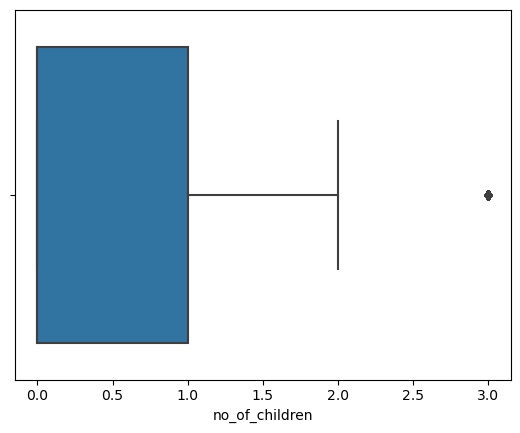

In [258]:
sns.boxplot(x="no_of_children",data=factors)

<Axes: xlabel='no_of_adults'>

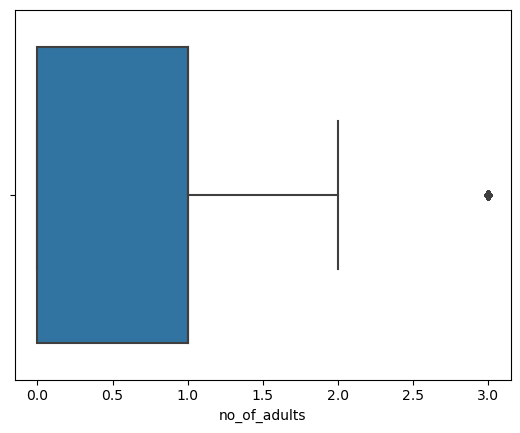

In [259]:
sns.boxplot(x="no_of_adults",data=factors)

# Data visualisation

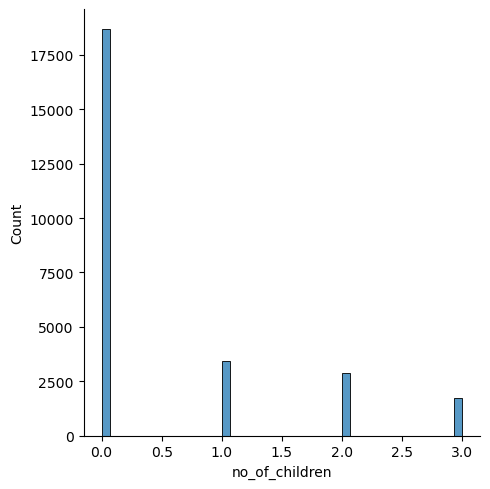

In [260]:
sns.displot(x="no_of_children",data=factors)

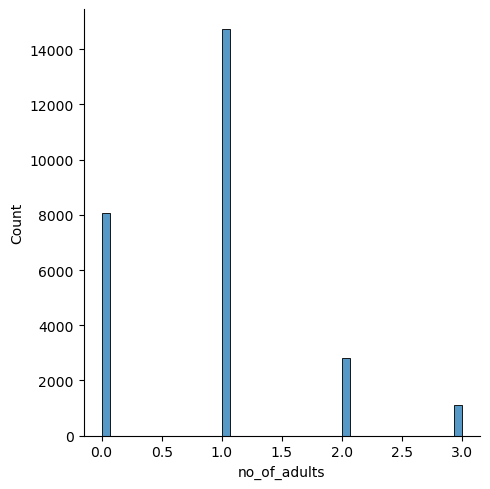

In [261]:
sns.displot(x="no_of_adults",data=factors)

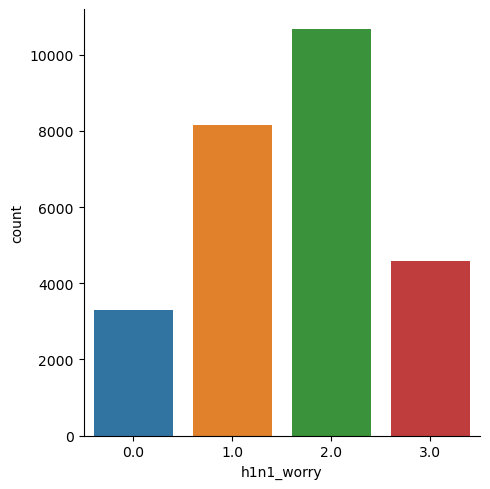

In [262]:
sns.catplot(x='h1n1_worry', data=factors, kind='count')

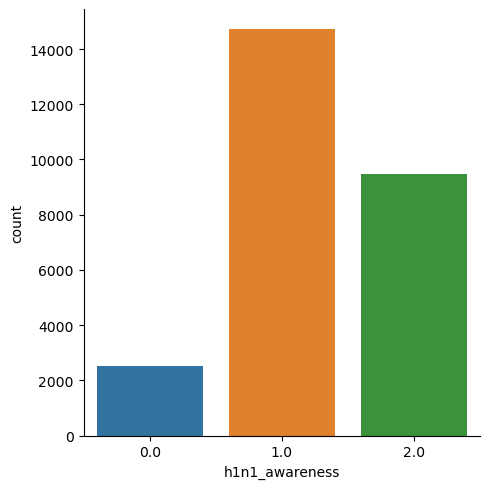

In [263]:
sns.catplot(x='h1n1_awareness', data=factors, kind='count')

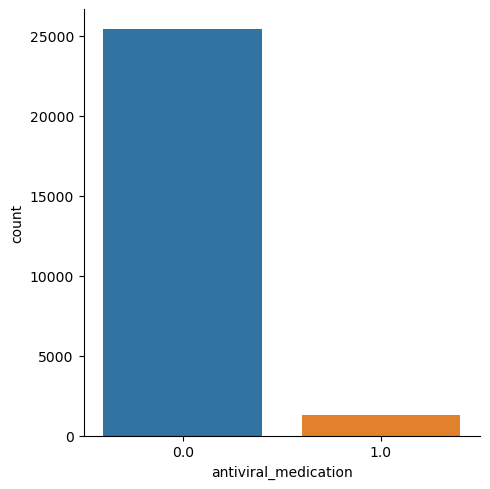

In [264]:
sns.catplot(x='antiviral_medication', data=factors, kind='count')

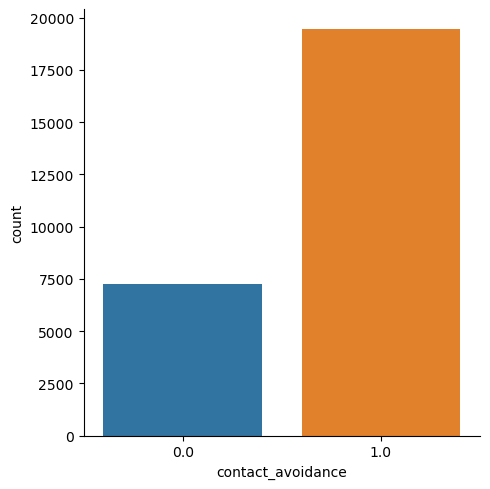

In [265]:
sns.catplot(x='contact_avoidance', data=factors, kind='count')

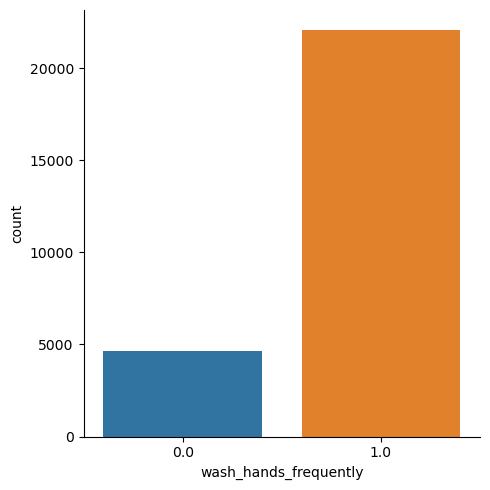

In [266]:
sns.catplot(x='wash_hands_frequently', data=factors, kind='count')

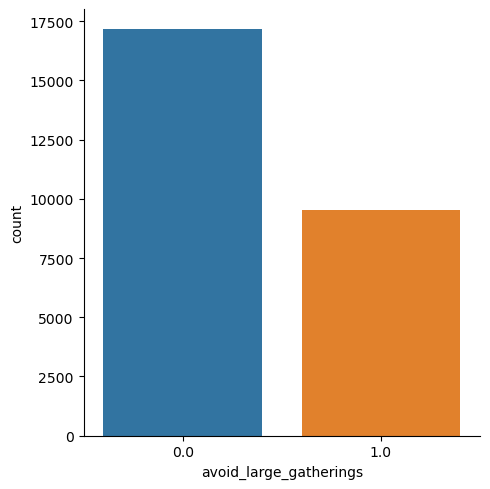

In [267]:
sns.catplot(x='avoid_large_gatherings', data=factors, kind='count')

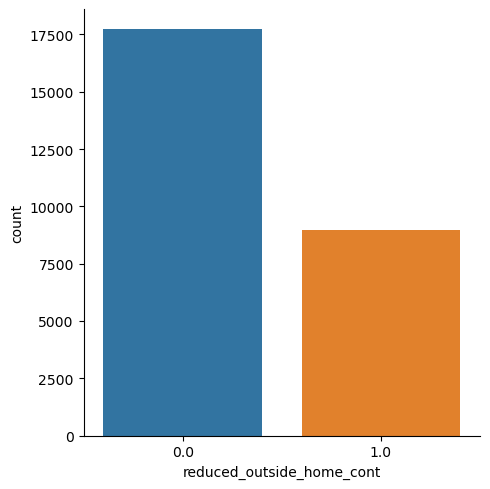

In [268]:
sns.catplot(x='reduced_outside_home_cont', data=factors, kind='count')

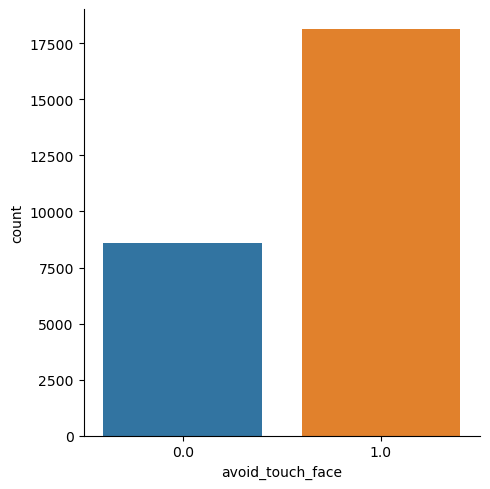

In [269]:
sns.catplot(x='avoid_touch_face', data=factors, kind='count')

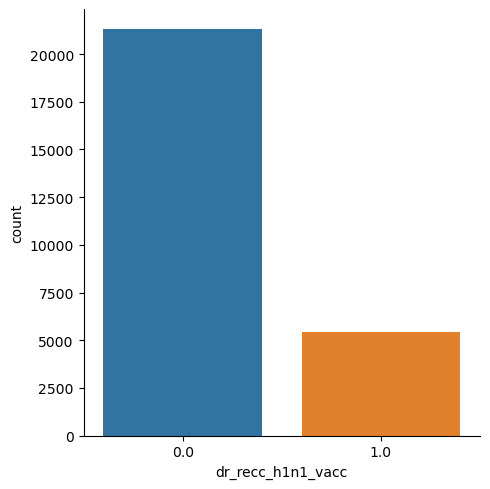

In [270]:
sns.catplot(x='dr_recc_h1n1_vacc', data=factors, kind='count')

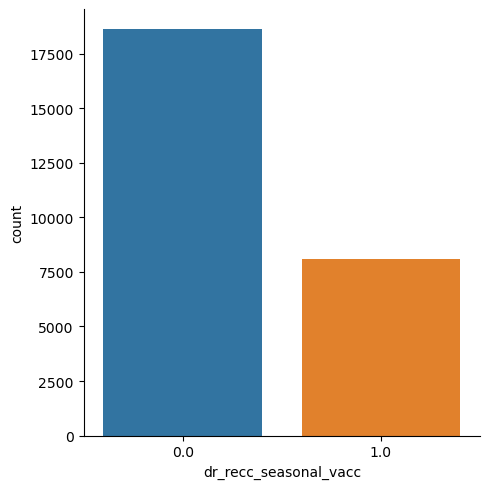

In [271]:
sns.catplot(x='dr_recc_seasonal_vacc', data=factors, kind='count')

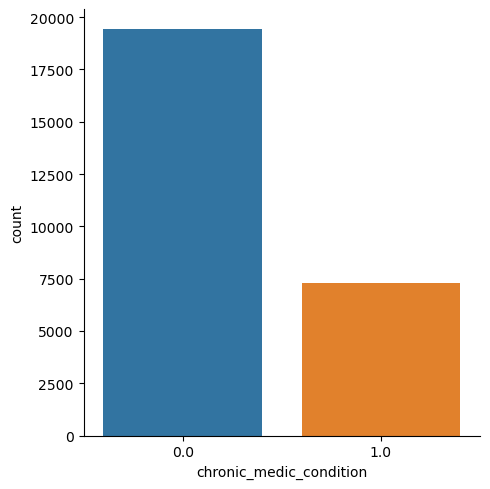

In [272]:
sns.catplot(x='chronic_medic_condition', data=factors, kind='count')

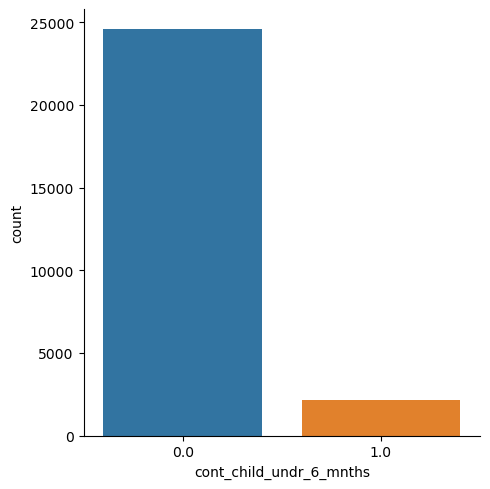

In [273]:
sns.catplot(x='cont_child_undr_6_mnths', data=factors, kind='count')

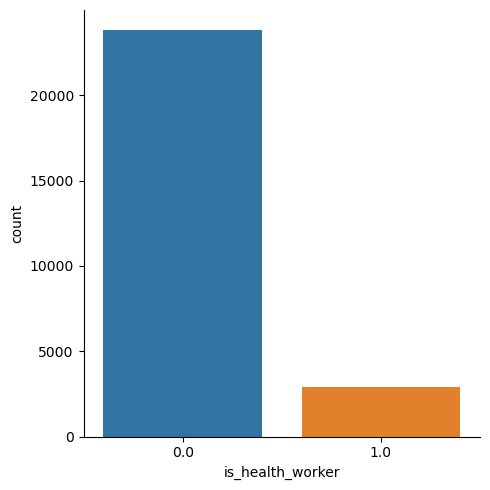

In [274]:
sns.catplot(x='is_health_worker', data=factors, kind='count')

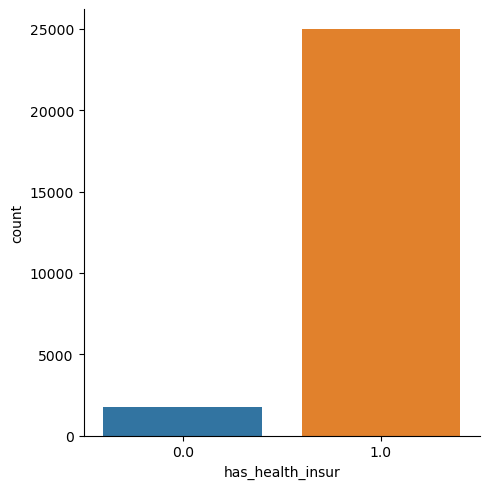

In [275]:
sns.catplot(x='has_health_insur', data=factors, kind='count')

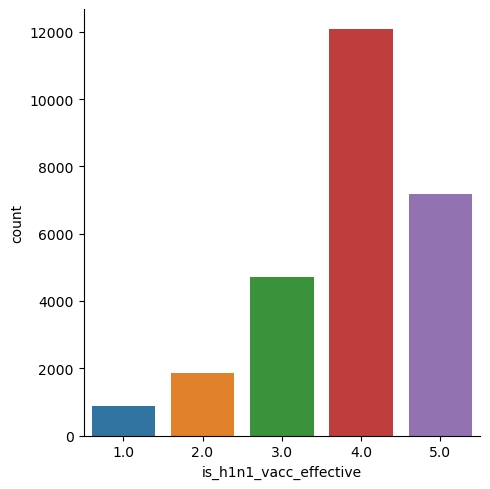

In [276]:
sns.catplot(x='is_h1n1_vacc_effective', data=factors, kind='count')

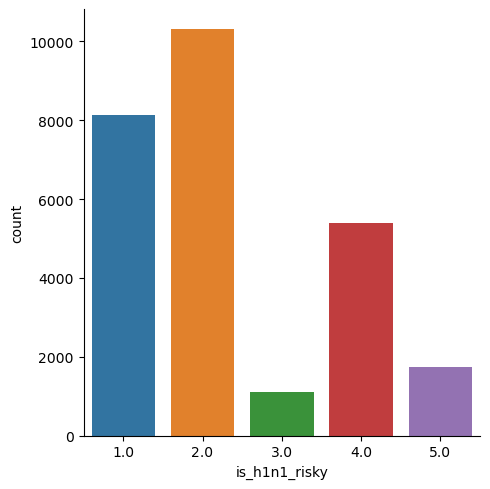

In [277]:
sns.catplot(x='is_h1n1_risky', data=factors, kind='count')

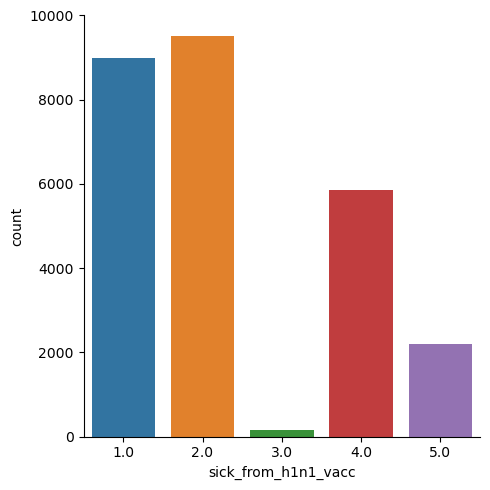

In [278]:
sns.catplot(x='sick_from_h1n1_vacc', data=factors, kind='count')

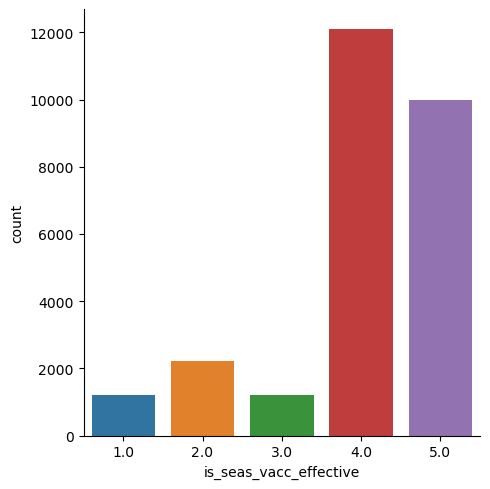

In [279]:
sns.catplot(x='is_seas_vacc_effective', data=factors, kind='count')

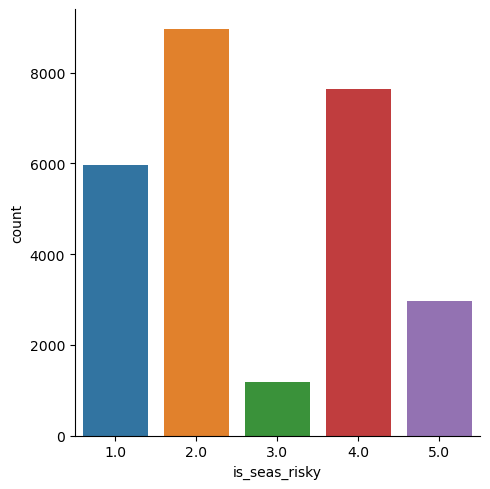

In [280]:
sns.catplot(x='is_seas_risky', data=factors, kind='count')

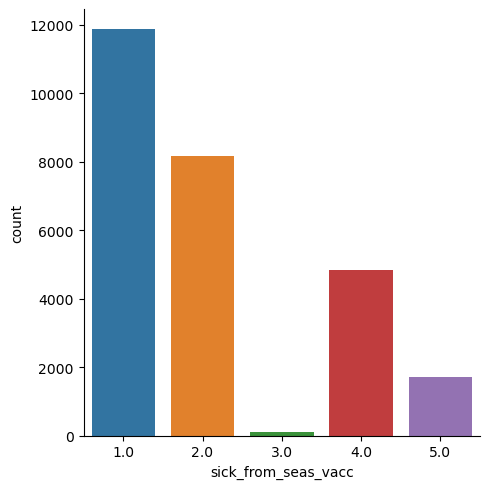

In [281]:
sns.catplot(x='sick_from_seas_vacc', data=factors, kind='count')

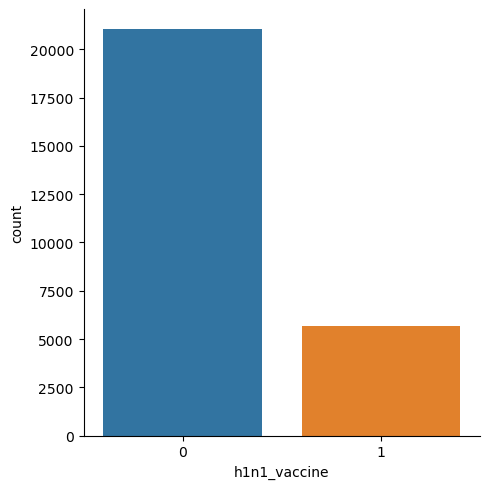

In [282]:
sns.catplot(x='h1n1_vaccine', data=title, kind='count')

# Correlation

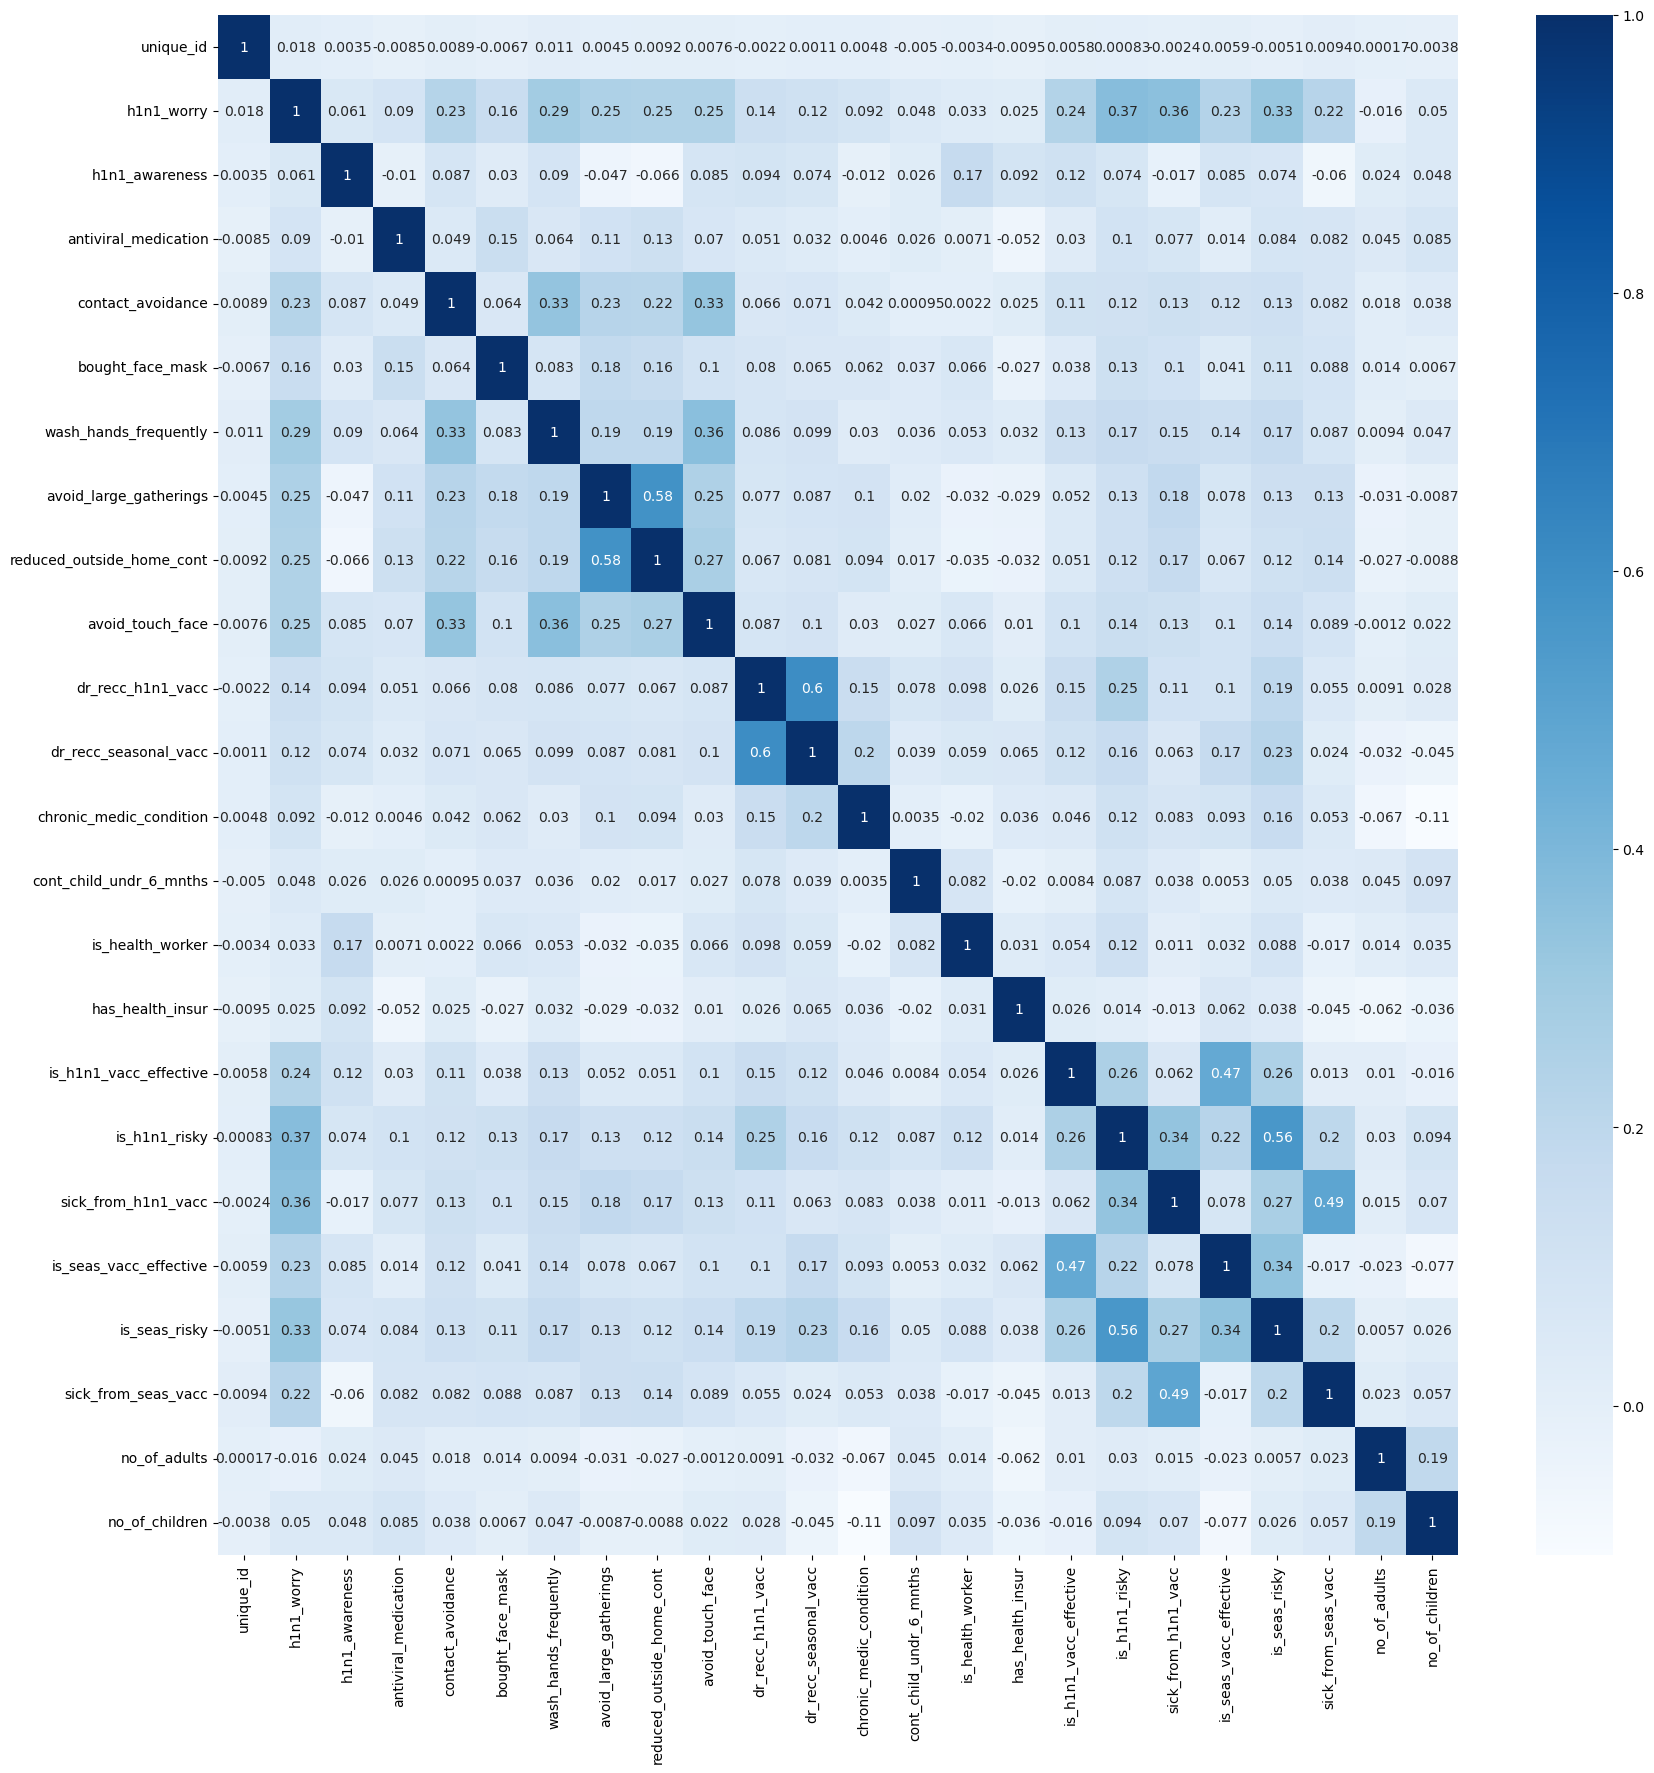

In [283]:
#get correlations of each features in dataset
corrmat = factors.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(factors[top_corr_features].corr(),annot=True,cmap="Blues")

In [284]:
factors.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [285]:
factors.drop(['sick_from_seas_vacc','census_msa','no_of_adults','no_of_children','antiviral_medication',"qualification"], axis = 1, inplace = True)

In [286]:
X_data = factors
Y_data = title

In [287]:
Y_data

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [288]:
X_data

,unique_id,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,race,sex,income_level,marital_status,housing_status,employment
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,1.0,55 - 64 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,2.0,35 - 44 Years,White,Male,Below Poverty,Not Married,Rent,Employed
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,5.0,4.0,65+ Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,3.0,1.0,45 - 54 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,2.0,65+ Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force
26703,26703,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2.0,5.0,1.0,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed
26704,26704,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,2.0,5.0,4.0,55 - 64 Years,White,Female,No Category,Not Married,Own,No Category
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,18 - 34 Years,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed


## The object dtypes should be changed

In [289]:
X_data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
age_bracket                   object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
employment                    object
d

In [290]:
X_data=pd.get_dummies(X_data,columns=["employment","age_bracket","race","sex","income_level","marital_status","housing_status"])

In [291]:
X_data.dtypes

unique_id                                   int64
h1n1_worry                                float64
h1n1_awareness                            float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [292]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.3, random_state=23)

# Heat map

In [293]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #heat map
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


<Axes: >

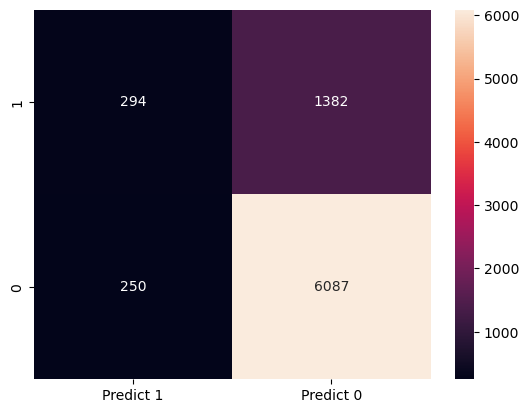

In [294]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)
predictions=reg.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
fact_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]] )

sns.heatmap(fact_cm,annot=True, fmt='g')

# Logistic Regression Model

In [295]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, Y_train)

Train_score=reg.score(X_train,Y_train)
print("The Train set score:",Train_score)

Test_score=reg.score(X_test,Y_test)
print("The Test set score:",Test_score)

The Train set score: 0.7893976677008666
The Test set score: 0.7963309621864471


# Predicted values

In [296]:
Y_predictions = reg.predict(X_test)

print("Predicted output: ",Y_predictions)
print(Y_predictions.shape)
print(Y_test.shape)

Predicted output:  [0 0 0 ... 0 0 0]
(8013,)
(8013, 1)


In [297]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predictions))

0.7963309621864471


In [298]:
log_score = accuracy_score(Y_test, Y_predictions)
print(log_score)

0.7963309621864471


## Creating an empty dataframe for storing the scores

In [299]:
Data = pd.DataFrame()

 Storing values

In [300]:
Data_model = pd.DataFrame({'Models': ['Logistic Regression model'], 'Accuracy':[log_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331


# Support vector Classifier

In [301]:
from sklearn.svm import SVC

model_svc=SVC()
model_svc.fit(X_train,Y_train)


Train_score=model_svc.score(X_train,Y_train)
print("The Train set score:",Train_score)

Test_score=model_svc.score(X_test,Y_test)
print("The Test set score:",Test_score)

The Train set score: 0.7861345886380657
The Test set score: 0.7908398851865718


# Predicted values

In [302]:
Y_predict_svc = model_svc.predict(X_test)

print("Predicted output: ",Y_predict_svc)
print(Y_predict_svc.shape)
print(Y_test.shape)

Predicted output:  [0 0 0 ... 0 0 0]
(8013,)
(8013, 1)


In [303]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_svc))

0.7908398851865718


In [304]:
svc_score = accuracy_score(Y_test, Y_predict_svc)
print(svc_score)

0.7908398851865718


Storing values

In [305]:
Data_model = pd.DataFrame({'Models': ['Support vector Classifier model'], 'Accuracy':[svc_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840


# DECISION TREE CLASSIFIER

In [306]:
from sklearn import tree
modelTreeReg = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=8)
modelTreeReg.fit(X_train, Y_train)


ScoreTreeReg=modelTreeReg.score(X_train,Y_train)
print("The train score:",ScoreTreeReg)

TestscoreTreeReg=modelTreeReg.score(X_test,Y_test)
print("The Test score:",TestscoreTreeReg)

The train score: 0.83534824007703
The Test score: 0.8343941095719456


# Predicted values

In [307]:
Y_predict_tree = modelTreeReg.predict(X_test)

print("Predicted output: ",Y_predict_tree)
print(Y_predict_tree.shape)
print(Y_test.shape)

Predicted output:  [1 0 1 ... 0 0 0]
(8013,)
(8013, 1)


In [308]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_tree))

0.8343941095719456


In [309]:
tree_score = accuracy_score(Y_test, Y_predict_tree)
print(tree_score)

0.8343941095719456


In [310]:
Data_model = pd.DataFrame({'Models': ['Decision tree Classifier model'], 'Accuracy':[tree_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394


# Bagging Classifier model

In [311]:
from sklearn.ensemble import BaggingClassifier

model_bag=BaggingClassifier(n_estimators=30, max_features=6, random_state=0)
model_bag.fit(X_train,Y_train)


Train_score=model_bag.score(X_train,Y_train)
print("The Train set score:",Train_score)

Test_score=model_bag.score(X_test,Y_test)
print("The Test set score:",Test_score)

The Train set score: 0.8014336150636567
The Test set score: 0.7923374516410833


# Predicted values

In [312]:
Y_predict_bag = model_bag.predict(X_test)

print("Predicted output: ",Y_predict_bag)
print(Y_predict_bag.shape)
print(Y_test.shape)

Predicted output:  [0 0 0 ... 0 0 0]
(8013,)
(8013, 1)


In [313]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_bag))

0.7923374516410833


In [314]:
bag_score = accuracy_score(Y_test, Y_predict_bag)
print(bag_score)

0.7923374516410833


In [315]:
Data_model = pd.DataFrame({'Models': ['Bagging Classifier model'], 'Accuracy':[bag_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394
0,Bagging Classifier model,0.792337


# ADA Boost model

In [316]:
from sklearn.ensemble import AdaBoostClassifier



model_ada=AdaBoostClassifier()
model_ada.fit(X_train,Y_train)


print("The train set score:",model_ada.score(X_train,Y_train))
print("The Test set score:",model_ada.score(X_test,Y_test))

The train set score: 0.8344923504867872
The Test set score: 0.8371396480718832


## Predicted values from adaboost model

In [317]:
Y_predict_ada = model_ada.predict(X_test)

print("Predicted output: ",Y_predict_ada)
print(Y_predict_ada.shape)
print(Y_test.shape)

Predicted output:  [1 0 1 ... 0 0 0]
(8013,)
(8013, 1)


In [318]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_ada))

0.8371396480718832


In [319]:
ada_score = accuracy_score(Y_test, Y_predict_ada)
print(ada_score)

0.8371396480718832


In [320]:
Data_model = pd.DataFrame({'Models': ['ADABoost model'], 'Accuracy':[ada_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394
0,Bagging Classifier model,0.792337
0,ADABoost model,0.837140


# Gradient Boosting model

In [321]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad=GradientBoostingClassifier()
model_grad.fit(X_train,Y_train)

print("The train set score:",model_grad.score(X_train,Y_train))
print("The Test set score:",model_grad.score(X_test,Y_test))

The train set score: 0.8418209051032417
The Test set score: 0.8383876201173094


## Predicted values from Gradientboost model

In [322]:
Y_predict_grad = model_grad.predict(X_test)

print("Predicted output: ",Y_predict_grad)
print(Y_predict_grad.shape)
print(Y_test.shape)

Predicted output:  [1 0 1 ... 0 0 0]
(8013,)
(8013, 1)


In [323]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_grad))

0.8383876201173094


In [324]:
grad_score = accuracy_score(Y_test, Y_predict_grad)
print(grad_score)

0.8383876201173094


In [325]:
Data_model = pd.DataFrame({'Models': ['Gradient Boosting model'], 'Accuracy':[grad_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394
0,Bagging Classifier model,0.792337
0,ADABoost model,0.837140
0,Gradient Boosting model,0.838388


# RANDOM FOREST CLASSIFIER

In [326]:
from sklearn.ensemble import RandomForestClassifier

model_ran=RandomForestClassifier(n_estimators=10, max_features=6, max_depth=10, min_samples_split=3,min_samples_leaf=2, random_state=0)
model_ran.fit(X_train,Y_train)


Train_score=model_ran.score(X_train,Y_train)
print("The Train set score:",Train_score)

Test_score=model_ran.score(X_test,Y_test)
print("The Test set score:",Test_score)

The Train set score: 0.858082807317856
The Test set score: 0.8357668788219144


# Predicted values

In [327]:
Y_predict_ran = model_ran.predict(X_test)

print("Predicted output: ",Y_predict_ran)
print(Y_predict_ran.shape)
print(Y_test.shape)

Predicted output:  [1 0 0 ... 0 0 0]
(8013,)
(8013, 1)


In [328]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict_ran))

0.8357668788219144


In [329]:
ran_score = accuracy_score(Y_test, Y_predict_ran)
print(ran_score)

0.8357668788219144


In [330]:
Data_model = pd.DataFrame({'Models': ['Random Forest Classifier model'], 'Accuracy':[ran_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394
0,Bagging Classifier model,0.792337
0,ADABoost model,0.837140
0,Gradient Boosting model,0.838388
0,Random Forest Classifier model,0.835767


# Data

In [331]:
Data

,Models,Accuracy
0,Logistic Regression model,0.796331
0,Support vector Classifier model,0.790840
0,Decision tree Classifier model,0.834394
0,Bagging Classifier model,0.792337
0,ADABoost model,0.837140
0,Gradient Boosting model,0.838388
0,Random Forest Classifier model,0.835767
